In [2]:
from embpred.config import DATA_DIR, MAP_PATH, REPORTS_DIR
import numpy as np
import pandas as pd
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


/Users/berk/opt/miniforge3/envs/emb/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/berk/opt/miniforge3/envs/emb/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <16CDBFFD-2722-3E45-AB23-3B071A6E6536> /Users/berk/opt/miniforge3/envs/emb/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/berk/opt/miniforge3/envs/emb/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/berk/opt/miniforge3/envs/emb/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/berk/opt/miniforge3/envs/emb/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/berk/opt/miniforge3/envs/emb/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be

In [3]:
with open(MAP_PATH, 'r') as f:
    map = json.load(f)
map = map["all-classes"]
map = {v: k for k, v in map.items()}
map

{0: 't1',
 1: 'tPN',
 2: 'tPNf',
 3: 't2',
 4: 't3',
 5: 't4',
 6: 't5',
 7: 't6',
 8: 't7',
 9: 't8',
 10: 'tM',
 11: 'tB',
 12: 'tEB',
 13: 'tEmpty'}

In [4]:
data = DATA_DIR / "resnet50_emb_crop.npz"

# laod npz file
npz = np.load(data)

# get the keys
keys = list(npz.keys())
keys

['embeddings', 'embeddings_with_temporal', 'labels', 'fnames']

In [5]:
embeddings = npz["embeddings"]
embeddings_temporal = npz["embeddings_with_temporal"]
labels = npz["labels"]

# get the unique values and counts of the labels
unique, counts = np.unique(labels, return_counts=True)
#print(unique, counts)

# for each unique label value, randomly select 500 samples and get the embedding for each randomy sampeld point 
new_embeddings = []
new_embeddings_temporal = []
new_labels = []
SAMPLE_SIZE = 200
for label in unique:
    idx = np.where(labels == label)[0]
    idx = np.random.choice(idx, SAMPLE_SIZE)
    for i in idx:
        assert(labels[i] == label)
    new_embeddings.append(embeddings[idx])
    new_label_set = labels[idx]
    print(np.unique(new_label_set, return_counts=True))
    new_labels.append(new_label_set)
    new_embeddings_temporal.append(embeddings_temporal[idx])

embeddings_sampled = np.concatenate(new_embeddings, axis=0)
labels_sampled = np.concatenate(new_labels, axis=0)
embeddings_temporal_sampled = np.concatenate(new_embeddings_temporal, axis=0)
print(embeddings_sampled.shape, labels_sampled.shape, embeddings_temporal_sampled.shape)

(array([0]), array([200]))
(array([1]), array([200]))
(array([2]), array([200]))
(array([3]), array([200]))
(array([4]), array([200]))
(array([5]), array([200]))
(array([6]), array([200]))
(array([7]), array([200]))
(array([8]), array([200]))
(array([9]), array([200]))
(array([10]), array([200]))
(array([11]), array([200]))
(array([12]), array([200]))
(array([13]), array([200]))
(2800, 2048) (2800,) (2800, 2049)


In [5]:
# ----- Dimensionality Reduction -----
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_emb = pca.fit_transform(embeddings_sampled)
print("Finished PCA on embeddings_sample")
tsne_emb = tsne.fit_transform(embeddings_sampled)
print("Finished tSNE on embeddings_sampled")

pca_emb_temporal = pca.fit_transform(embeddings_temporal_sampled)
print("Finished PCA on embeddings_temporal")
tsne_emb_temporal = tsne.fit_transform(embeddings_temporal_sampled)
print("Finished tSNE on embeddings_temporal_sampled")

Finished PCA on embeddings_sample
Finished tSNE on embeddings_sampled
Finished PCA on embeddings_temporal
Finished tSNE on embeddings_temporal_sampled


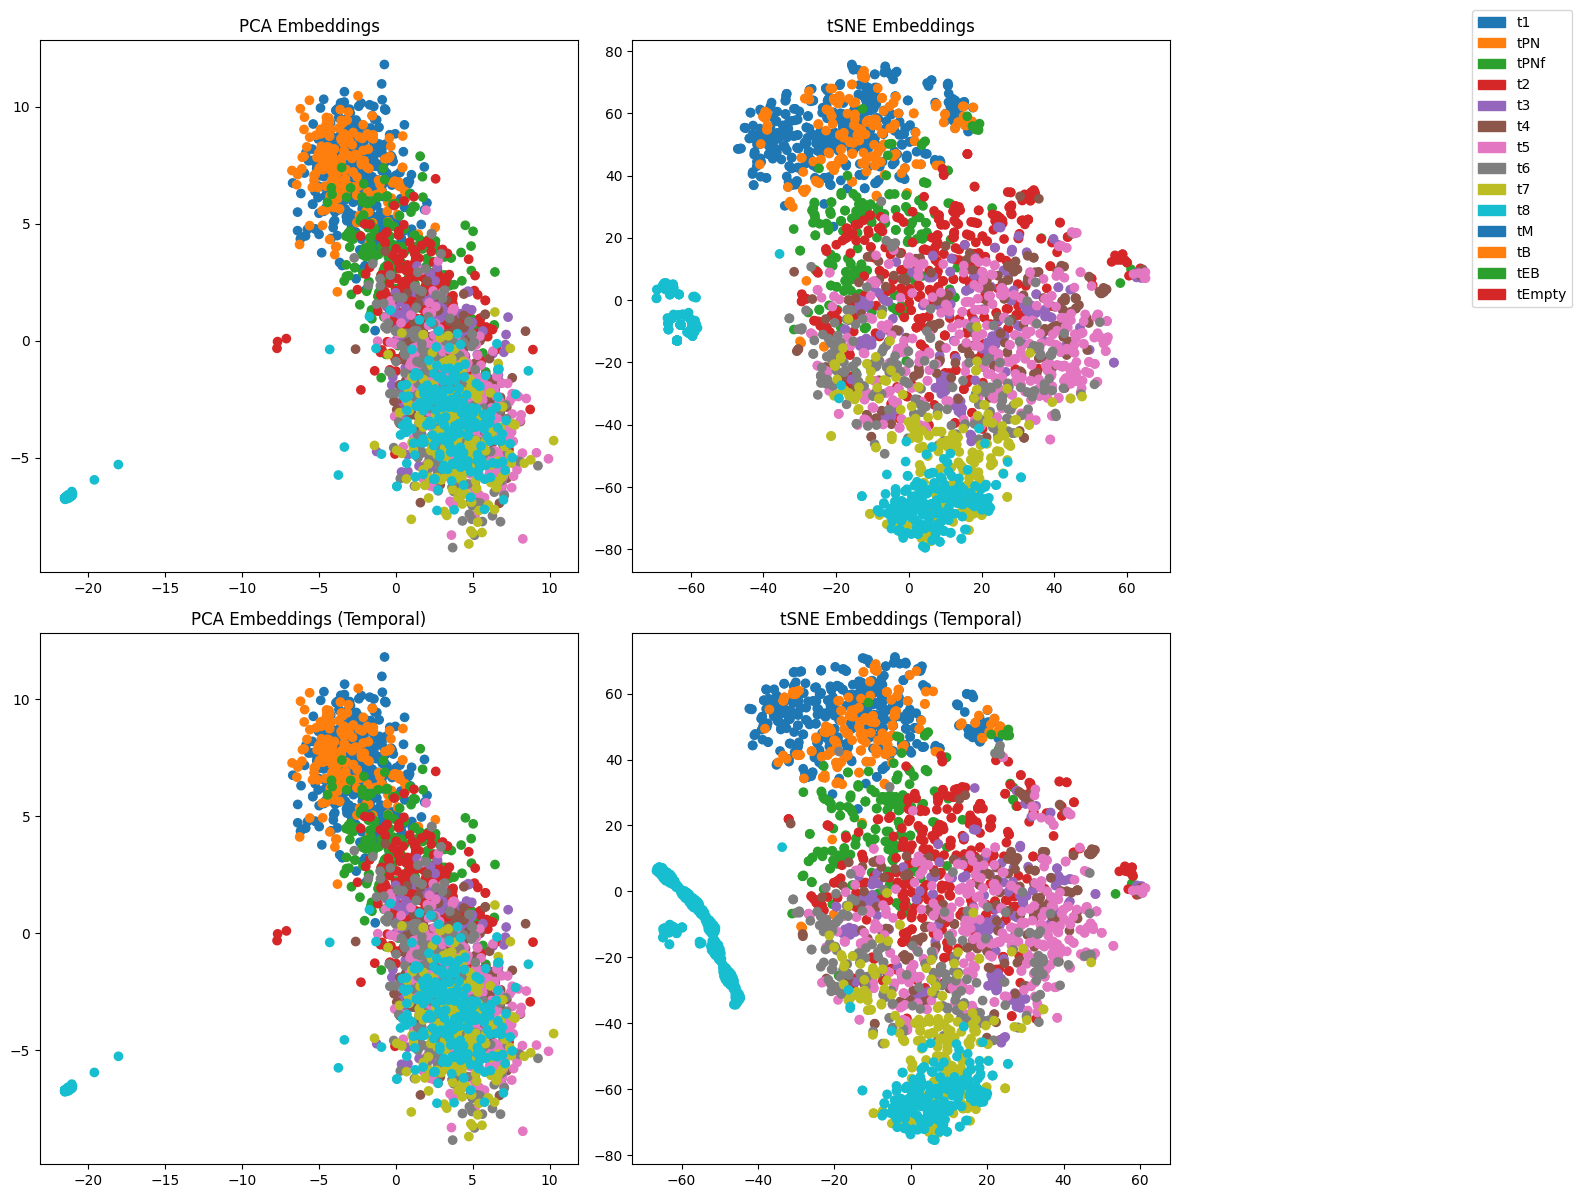

In [6]:

# ----- Plotting -----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

axs[0, 0].scatter(pca_emb[:, 0], pca_emb[:, 1], c=labels_sampled, cmap='tab10')
axs[0, 0].set_title("PCA Embeddings")

axs[0, 1].scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=labels_sampled, cmap='tab10')
axs[0, 1].set_title("tSNE Embeddings")

axs[1, 0].scatter(pca_emb_temporal[:, 0], pca_emb_temporal[:, 1], c=labels_sampled, cmap='tab10')
axs[1, 0].set_title("PCA Embeddings (Temporal)")

axs[1, 1].scatter(tsne_emb_temporal[:, 0], tsne_emb_temporal[:, 1], c=labels_sampled, cmap='tab10')
axs[1, 1].set_title("tSNE Embeddings (Temporal)")

# ----- Create Legend -----
# Get unique labels from the sampled labels (these are integers).
unique_labels = np.unique(labels_sampled)

# Build handles mapping each unique label to its class name and a color sampled from the 'tab10' colormap.
handles = []
for i, label in enumerate(unique_labels):
    color = plt.cm.tab10(i % 10)  # use modulo in case there are more than 10 classes
    label_name = map.get(label, str(label))
    patch = mpatches.Patch(color=color, label=label_name)
    handles.append(patch)

# Place the legend outside the main plot.
fig.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Concatenating the temporal value to the feature vector does not add much information

/var/folders/zw/x039kr6x13v1d173wnlv4fv80000gn/T/ipykernel_78399/2399303927.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)


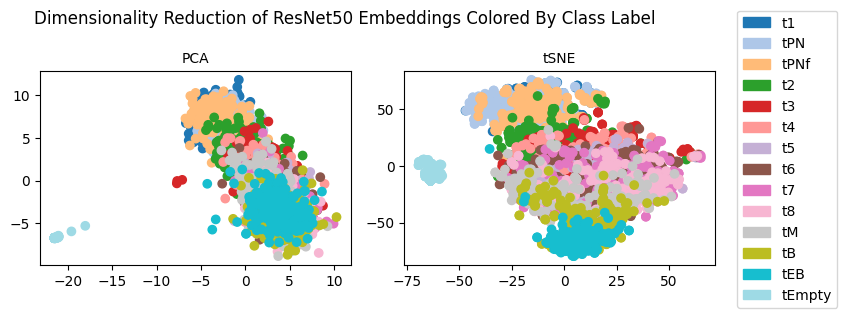

In [37]:
# TO KEEP
# Create a figure with one row (first row: PCA and t-SNE embeddings)
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

fig.suptitle("Dimensionality Reduction of ResNet50 Embeddings Colored By Class Label", fontsize=12)

# Plot PCA embeddings on the left subplot.
cmap = plt.cm.get_cmap('tab20', 14)
axs[0].scatter(pca_emb[:, 0], pca_emb[:, 1], c=labels_sampled, cmap=cmap)
axs[0].set_title("PCA", fontsize=10)

# Plot t-SNE embeddings on the right subplot.
axs[1].scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=labels_sampled, cmap=cmap)
axs[1].set_title("tSNE", fontsize=10)

# ----- Create Legend -----
unique_labels = np.unique(labels_sampled)
handles = []
# Create legend handles using the updated colormap.
unique_labels = np.unique(labels_sampled)
handles = []
for i, label in enumerate(unique_labels):
    color = cmap(i % 14)  # ensures color is drawn from the colormap with 13 distinct colors
    label_name = map.get(label, str(label))
    patch = mpatches.Patch(color=color, label=label_name)
    handles.append(patch)

# Place the legend outside the main plot.
fig.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout(rect=[0, 0, 1.05, 1])

# Save the figure.
plt.savefig(REPORTS_DIR / "dim_red_resnet_embeddings.png", dpi=300)
plt.show()

In [12]:
embeddings_temporal.shape

# extract the last element of row 
time = embeddings_temporal[:, -1,]
time.shape
time.min(), time.max()

time_sampled = embeddings_temporal_sampled[:, -1,]
labels_sampled.shape, time_sampled.shape

((2800,), (2800,))

(77566,)

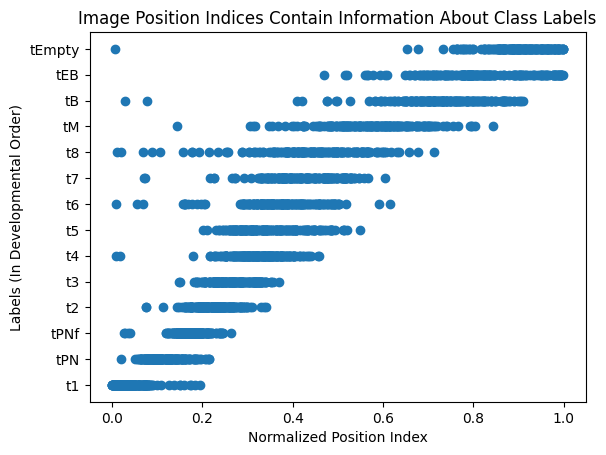

In [16]:
# Convert numeric labels to class names using the map dictionary
labels_sampled_names = np.vectorize(map.get)(labels_sampled)

# Plot the time vs the labels with class names on the y-axis
plt.scatter(time_sampled, labels_sampled_names)
plt.xlabel("Normalized Position Index")
plt.ylabel("Labels (In Developmental Order)")
plt.title("Image Position Indices Contain Information About Class Labels")
plt.savefig(REPORTS_DIR / "time_vs_labels.png", dpi=300)
plt.show()